In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl
%matplotlib inline

In [2]:
df = pd.read_excel(r'C:/Users/Acer/Desktop/Research/Market indices Daily2010.xlsx',index_col=0)

In [3]:
df.head()

,ASPI,Banks_finance_insurance,Berverage_Food_tobacco,Chemicals_Pharmaceuticals,Construction_Engineering,Diversified,Footwear_Textile,Healthcare,Hotels_Travels,Investment_Trusts,...,Land_Property,Manufacturing,Motors,Oil_Palms,Plantations,Power_Energy,Services,Stores_Supplies,Telecommunications,Trading
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,3481.64,6721.11,5588.24,5382.99,3688.07,1187.82,629.29,414.28,2962.85,37690.00,...,349.63,2052.62,7361.37,43675.36,641.70,83.86,11123.45,11649.28,154.57,3904.25
2010-01-05,3519.94,6810.09,5757.35,5392.97,3793.02,1196.31,629.25,417.28,3077.31,37440.71,...,350.34,2066.57,7386.19,43811.55,647.39,82.82,12266.18,11649.28,152.55,3845.27
2010-01-06,3509.36,6817.22,5790.17,5361.84,3746.95,1182.62,643.32,419.47,3160.33,36495.17,...,359.17,2053.84,7394.96,40976.88,639.34,82.87,12329.78,11649.28,151.04,3914.50
2010-01-07,3478.56,6796.83,5748.51,5279.52,3680.07,1178.24,643.32,418.08,3100.39,35791.33,...,361.43,2046.68,7409.26,40008.43,633.58,83.14,12092.33,11125.50,148.26,3879.55
2010-01-08,3514.63,6833.84,5775.33,5273.74,3639.49,1187.07,652.82,414.38,3123.74,35677.12,...,367.82,2059.70,7627.09,42395.27,660.36,82.98,12092.33,11141.21,150.54,4102.46


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1743 entries, 2010-01-04 to 2017-03-31
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ASPI                       1743 non-null   float64
 1   Banks_finance_insurance    1743 non-null   float64
 2   Berverage_Food_tobacco     1743 non-null   float64
 3   Chemicals_Pharmaceuticals  1743 non-null   float64
 4   Construction_Engineering   1743 non-null   float64
 5   Diversified                1743 non-null   float64
 6   Footwear_Textile           1743 non-null   float64
 7   Healthcare                 1743 non-null   float64
 8   Hotels_Travels             1743 non-null   float64
 9   Investment_Trusts          1743 non-null   float64
 10  IT                         1743 non-null   float64
 11  Land_Property              1743 non-null   float64
 12  Manufacturing              1743 non-null   float64
 13  Motors                     174

In [5]:
# Run a elbow method for identifiy k

In [5]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Banks_finance_insurance','Berverage_Food_tobacco','Chemicals_Pharmaceuticals','Construction_Engineering','Diversified','Footwear_Textile','Healthcare','Hotels_Travels','Investment_Trusts','IT','Land_Property','Manufacturing','Motors','Oil_Palms','Plantations','Power_Energy','Services','Stores_Supplies','Telecommunications','Trading']])
    sse.append(km.inertia_)

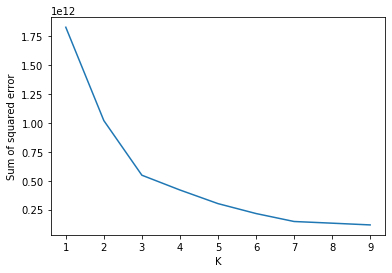

In [6]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [7]:
# as a result of elbow method k is 3

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Banks_finance_insurance','Berverage_Food_tobacco','Chemicals_Pharmaceuticals','Construction_Engineering','Diversified','Footwear_Textile','Healthcare','Hotels_Travels','Investment_Trusts','IT','Land_Property','Manufacturing','Motors','Oil_Palms','Plantations','Power_Energy','Services','Stores_Supplies','Telecommunications','Trading']])
y_predicted

array([2, 2, 2, ..., 2, 2, 2])

In [9]:
df['cluster']=y_predicted
df.head(500)

,ASPI,Banks_finance_insurance,Berverage_Food_tobacco,Chemicals_Pharmaceuticals,Construction_Engineering,Diversified,Footwear_Textile,Healthcare,Hotels_Travels,Investment_Trusts,...,Manufacturing,Motors,Oil_Palms,Plantations,Power_Energy,Services,Stores_Supplies,Telecommunications,Trading,cluster
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,3481.64,6721.11,5588.24,5382.99,3688.07,1187.82,629.29,414.28,2962.85,37690.00,...,2052.62,7361.37,43675.36,641.70,83.86,11123.45,11649.28,154.57,3904.25,2
2010-01-05,3519.94,6810.09,5757.35,5392.97,3793.02,1196.31,629.25,417.28,3077.31,37440.71,...,2066.57,7386.19,43811.55,647.39,82.82,12266.18,11649.28,152.55,3845.27,2
2010-01-06,3509.36,6817.22,5790.17,5361.84,3746.95,1182.62,643.32,419.47,3160.33,36495.17,...,2053.84,7394.96,40976.88,639.34,82.87,12329.78,11649.28,151.04,3914.50,2
2010-01-07,3478.56,6796.83,5748.51,5279.52,3680.07,1178.24,643.32,418.08,3100.39,35791.33,...,2046.68,7409.26,40008.43,633.58,83.14,12092.33,11125.50,148.26,3879.55,2
2010-01-08,3514.63,6833.84,5775.33,5273.74,3639.49,1187.07,652.82,414.38,3123.74,35677.12,...,2059.70,7627.09,42395.27,660.36,82.98,12092.33,11141.21,150.54,4102.46,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-27,5725.44,13102.45,11687.96,10436.35,3341.41,1787.90,1116.40,547.96,3564.16,26909.99,...,3067.20,25888.51,129210.94,815.38,124.15,22765.78,33307.54,158.51,22880.35,0
2012-01-30,5755.56,13264.81,11750.10,10722.60,3286.16,1795.74,1115.61,536.92,3553.10,27518.60,...,3098.10,26314.48,129619.94,807.89,123.39,23316.36,32679.01,157.80,23178.41,0
2012-01-31,5693.92,13111.75,11645.19,10572.03,3271.05,1774.09,1100.39,525.40,3474.05,27018.39,...,3066.65,26160.27,129021.87,804.86,120.72,23146.89,31915.74,159.21,22405.46,0


In [10]:
km.cluster_centers_

array([[1.48006126e+04, 1.80121039e+04, 7.51369495e+03, 3.06581129e+03,
        1.90595685e+03, 9.25184397e+02, 7.04348238e+02, 3.53946188e+03,
        2.05440138e+04, 9.46888123e+01, 5.98107883e+02, 3.32946759e+03,
        1.75379888e+04, 1.04337929e+05, 8.10214215e+02, 1.35265642e+02,
        2.39830766e+04, 2.50386757e+04, 1.79089013e+02, 1.67714012e+04],
       [1.60713990e+04, 1.18236833e+04, 1.22809763e+04, 3.86452400e+03,
        2.23838924e+03, 1.26719008e+03, 5.81442240e+02, 4.54461300e+03,
        4.18058351e+04, 2.66329200e+02, 6.07174000e+02, 3.74811672e+03,
        3.03070180e+04, 1.33398211e+05, 1.27403400e+03, 1.47345640e+02,
        2.83794398e+04, 6.01615540e+04, 1.90563440e+02, 2.60163553e+04],
       [1.33021355e+04, 1.68214567e+04, 6.73261379e+03, 3.00481893e+03,
        1.53068439e+03, 9.13921203e+02, 8.16351180e+02, 3.31431158e+03,
        1.92310586e+04, 7.27267929e+01, 5.75854878e+02, 3.64002024e+03,
        1.45334518e+04, 6.60505014e+04, 7.27243697e+02, 1.3378

In [11]:
km.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [12]:
 k_means_labels = km.labels_

In [13]:
n_clusters = 3

In [14]:
k_means_cluster_centers = km.cluster_centers_

In [15]:
X= df.values

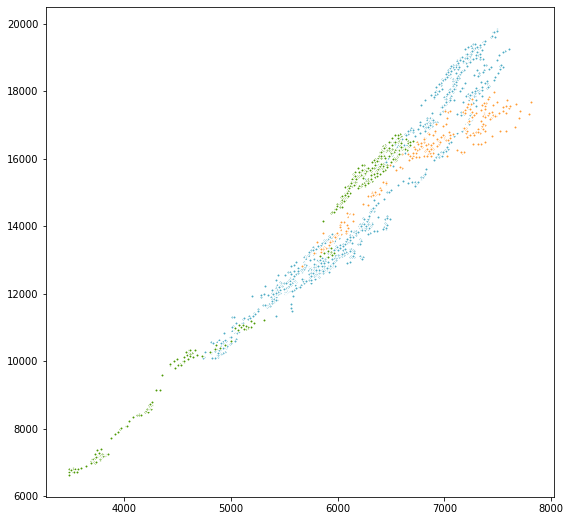

In [16]:
fig = pl.figure(figsize=(25, 8))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
 my_members = k_means_labels == k
 cluster_center = k_means_cluster_centers[k]
 ax.plot(X[my_members, 0], X[my_members, 1], 'w',markerfacecolor=col, marker='.')
 
 